In [1]:
# work notebook for the issue : 
# Add Multiplicative Models/Seasonals #178 
# https://github.com/antoinecarme/pyaf/issues/178


# gDecompositionType = "TSR"

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds

import pandas as pd

df = pd.read_csv("../../data/monthly-australian-wine-sales.csv")

import datetime
df['month'] = df['month'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

#df.tail(10)
#df[:-10].tail()
#df[:-10:-1]
#df.describe()


(         month  sales
 0   1980-01-01  15136
 1   1980-02-01  16733
 2   1980-03-01  20016
 3   1980-04-01  17708
 4   1980-05-01  18019
 ..         ...    ...
 171 1994-04-01  26323
 172 1994-05-01  23779
 173 1994-06-01  27549
 174 1994-07-01  29660
 175 1994-08-01  23356
 
 [176 rows x 2 columns],
 <AxesSubplot:xlabel='month'>)

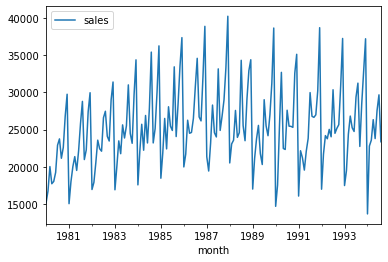

In [2]:
df, df.plot(x='month', y='sales')

INFO:pyaf.std:START_TRAINING 'sales'
/home/antoine/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/antoine/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['sales']' 3.3069467544555664
INFO:pyaf.std:TIME_DETAIL TimeVariable='month' TimeMin=1980-01-01T00:00:00.000000 TimeMax=1990-01-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=24
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='sales' Length=176  Min=13652 Max=40226  Mean=25392.147727272728 StdDev=5325.627485521334
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_sales' Min=13652 Max=40226  Mean=25392.147727272728 StdDev=5325.627485521334
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_sale

  Split Transformation DecompositionType  \
0  None         _sales             T+S+R   
1  None         _sales             T+S+R   
2  None         _sales             T+S+R   
3  None         _sales             T+S+R   
4  None         _sales             T+S+R   

                                               Model  \
0  _sales_ConstantTrend_residue_Seasonal_MonthOfY...   
1  _sales_PolyTrend_residue_Seasonal_MonthOfYear_...   
2  _sales_PolyTrend_residue_bestCycle_byMAPE_resi...   
3  _sales_PolyTrend_residue_Seasonal_MonthOfYear_...   
4  _sales_ConstantTrend_residue_Seasonal_MonthOfY...   

                                     DetailedFormula  \
0  (_sales, T+S+R, None, _sales_ConstantTrend_res...   
1  (_sales, T+S+R, None, _sales_PolyTrend_residue...   
2  (_sales, T+S+R, None, _sales_PolyTrend_residue...   
3  (_sales, T+S+R, None, _sales_PolyTrend_residue...   
4  (_sales, T+S+R, None, _sales_ConstantTrend_res...   

                                           Category  Complexi

INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 2.0582377910614014


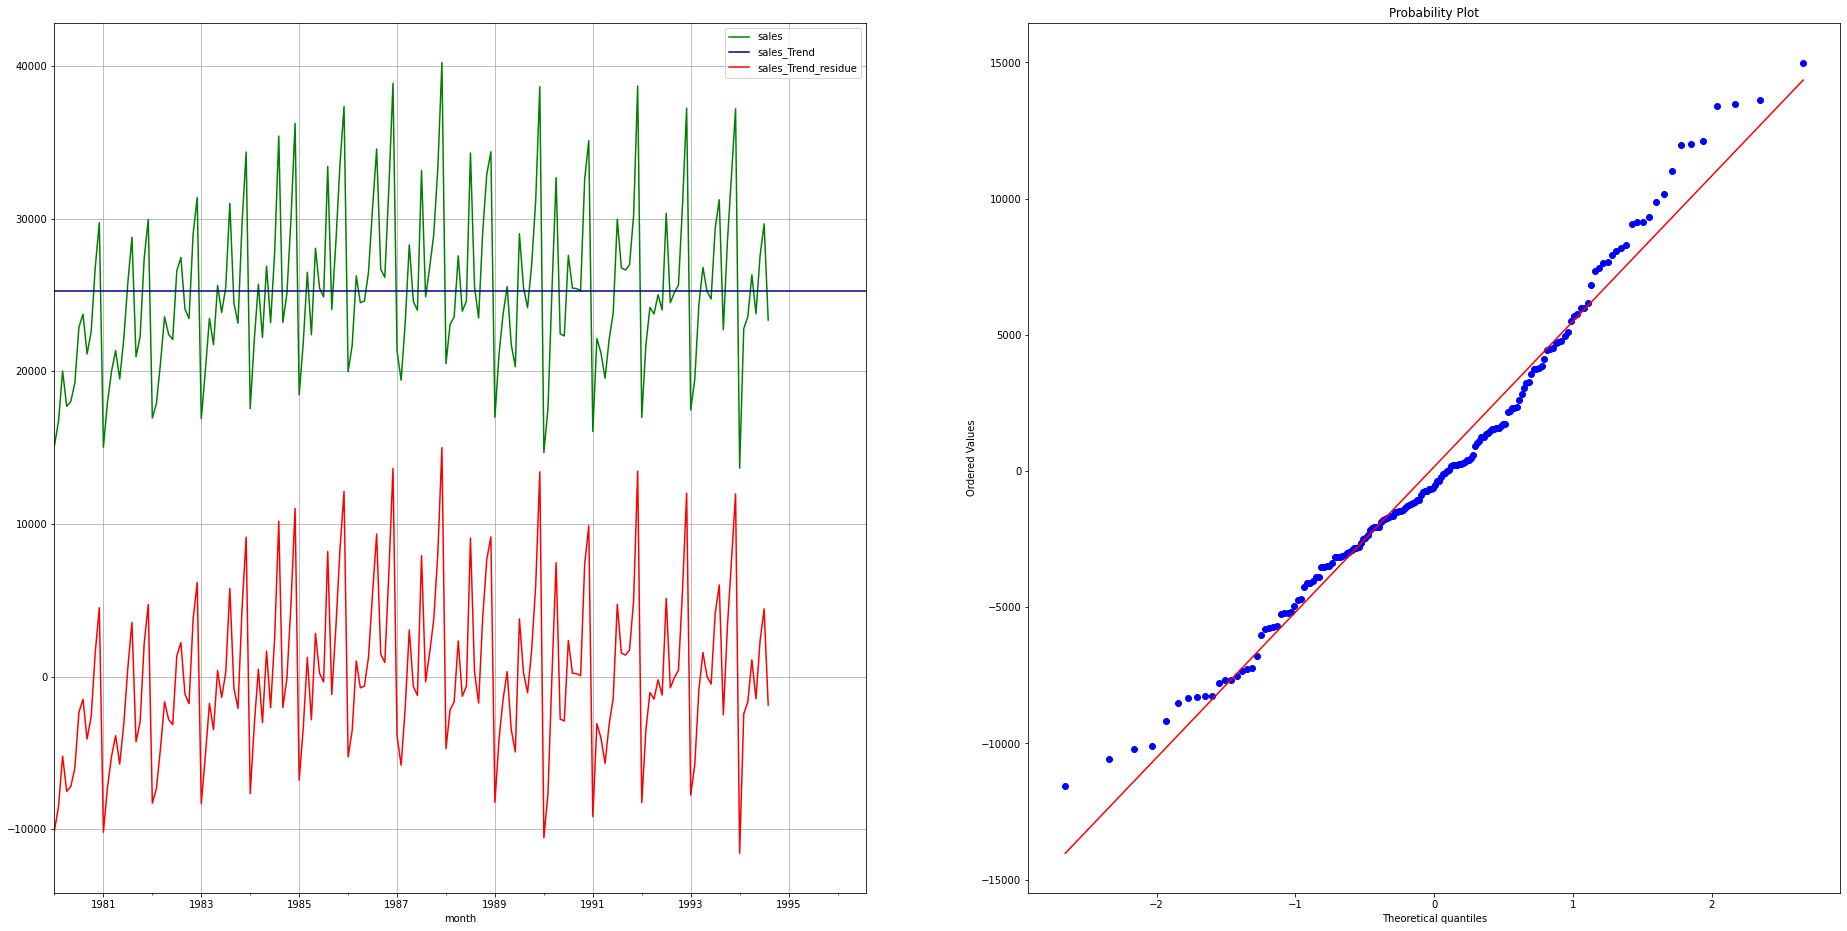

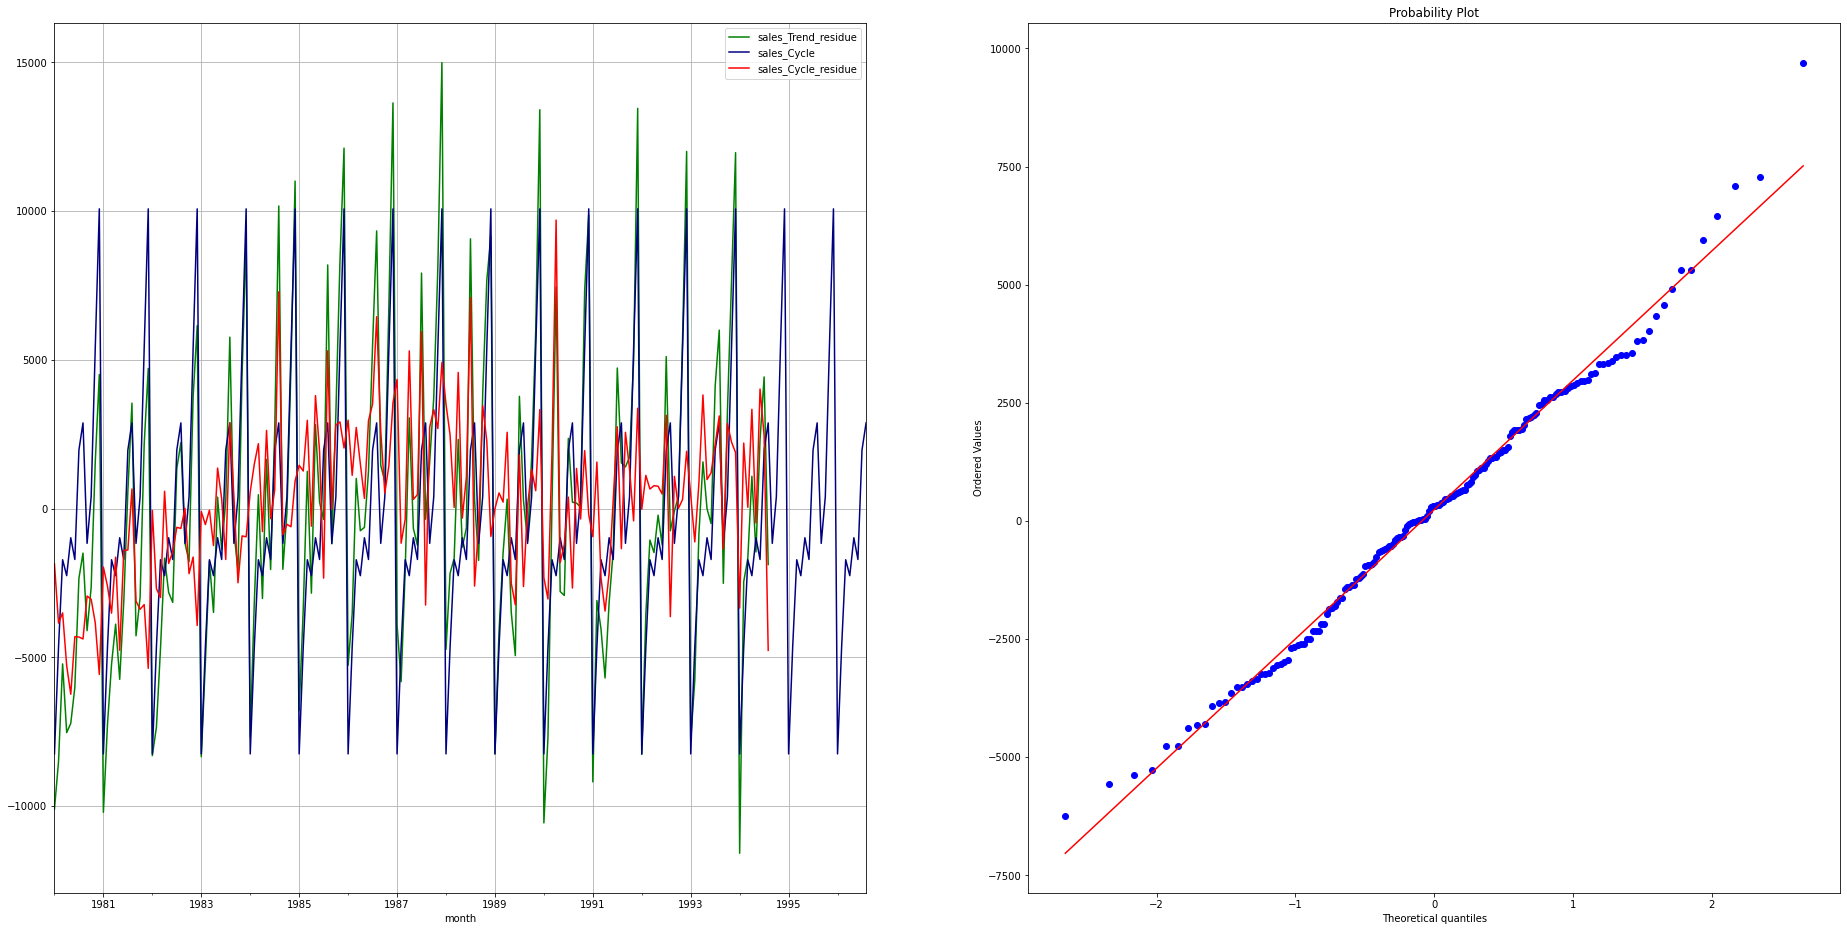

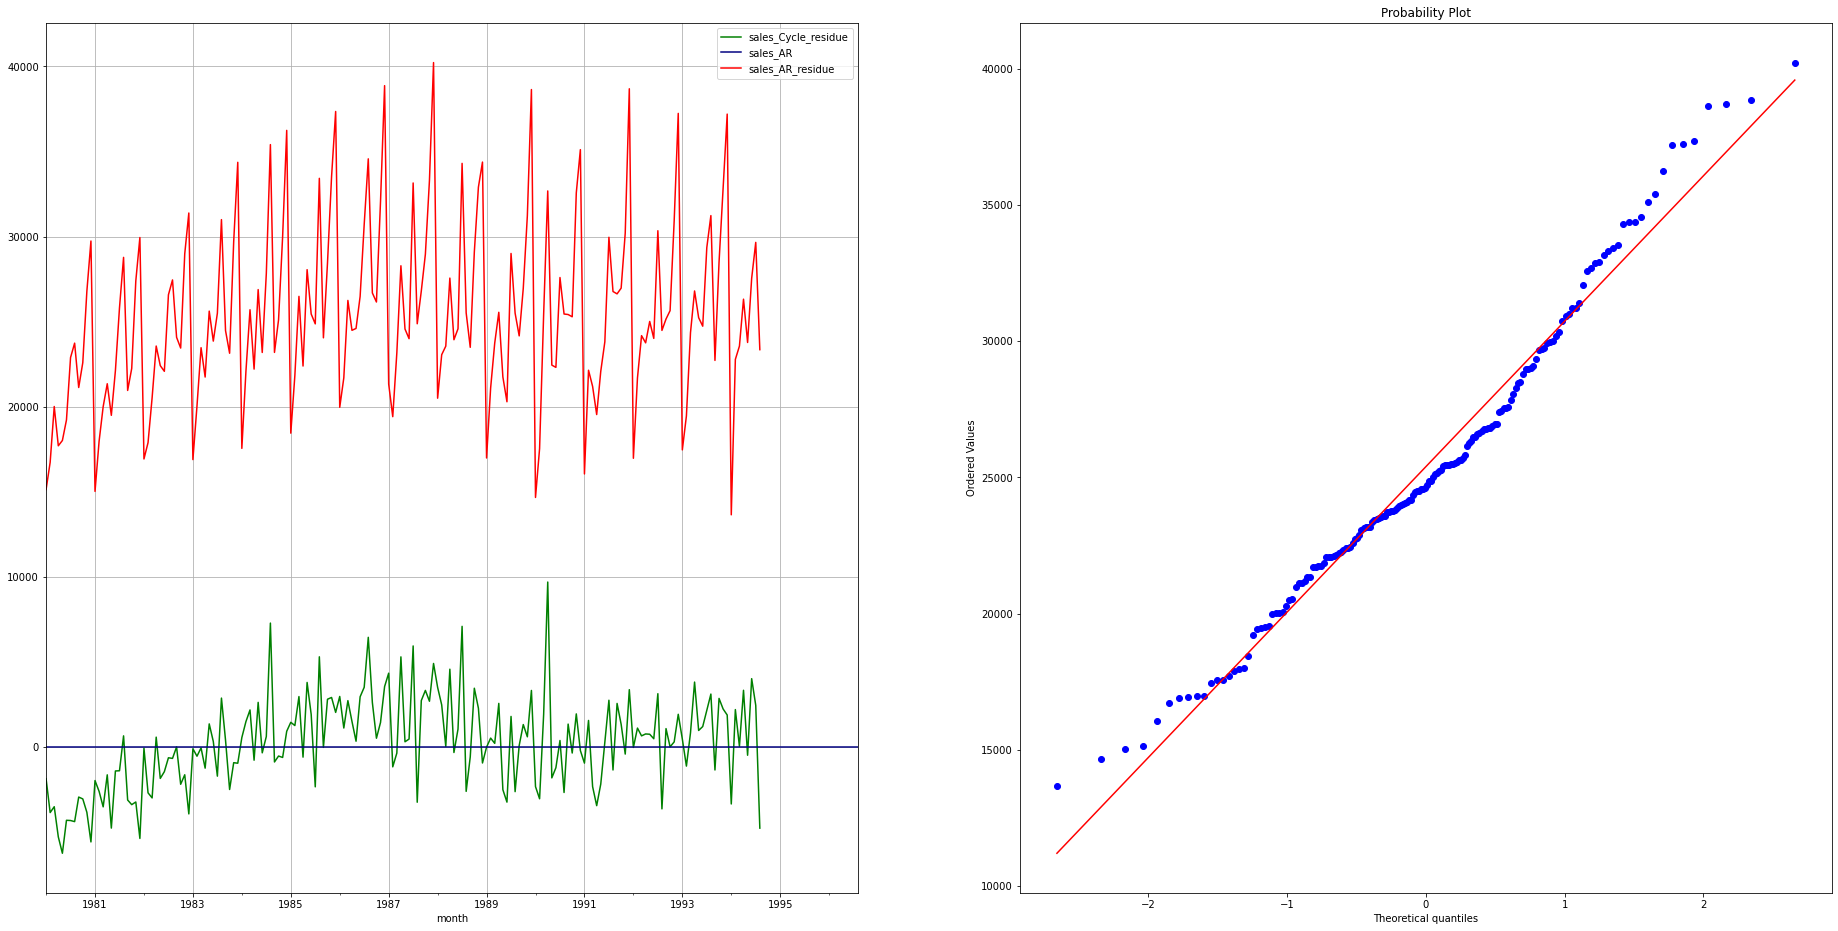

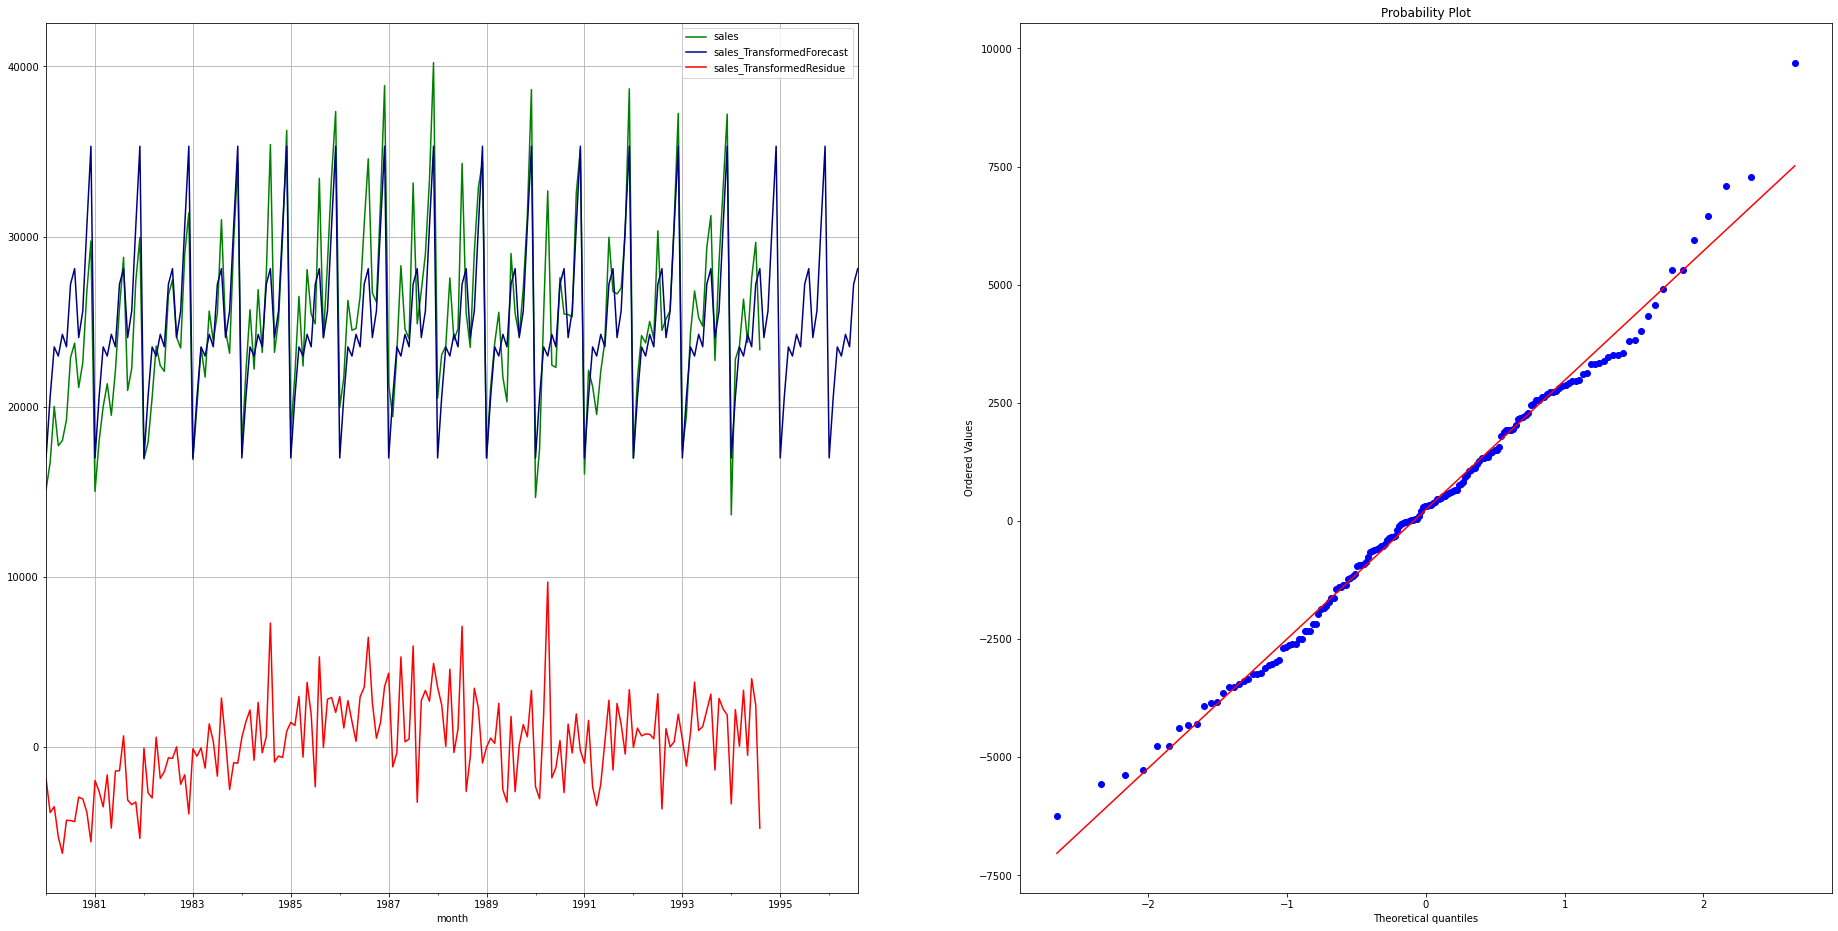

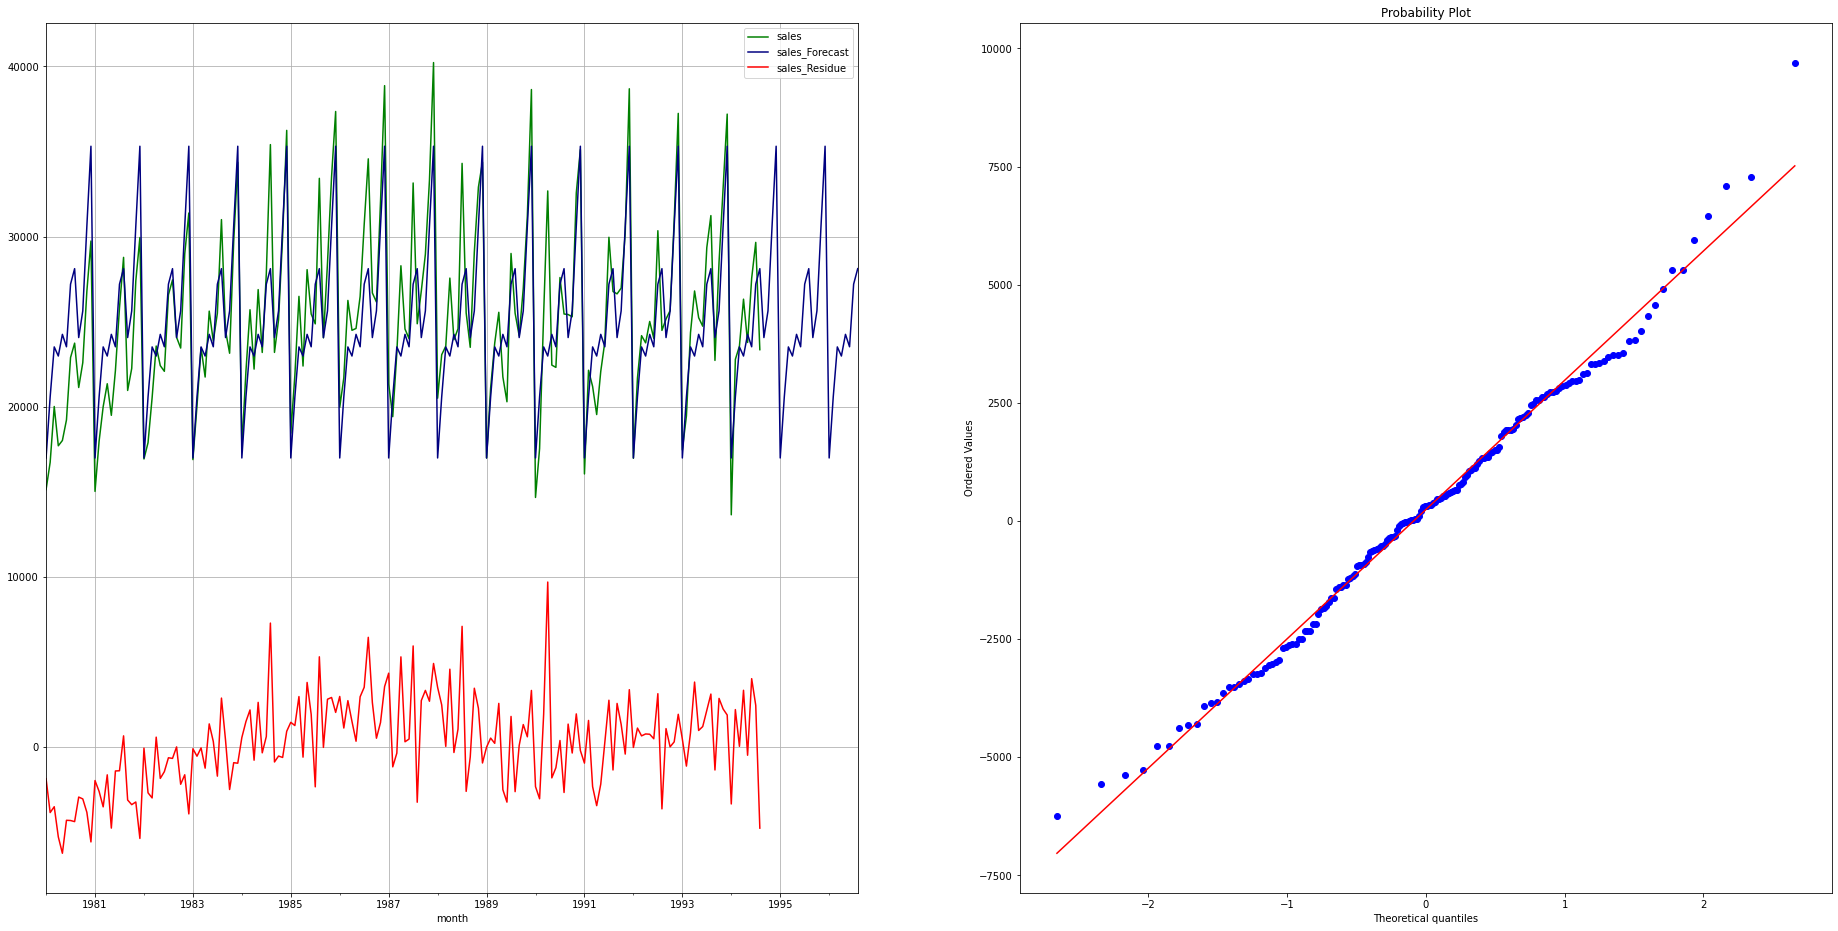

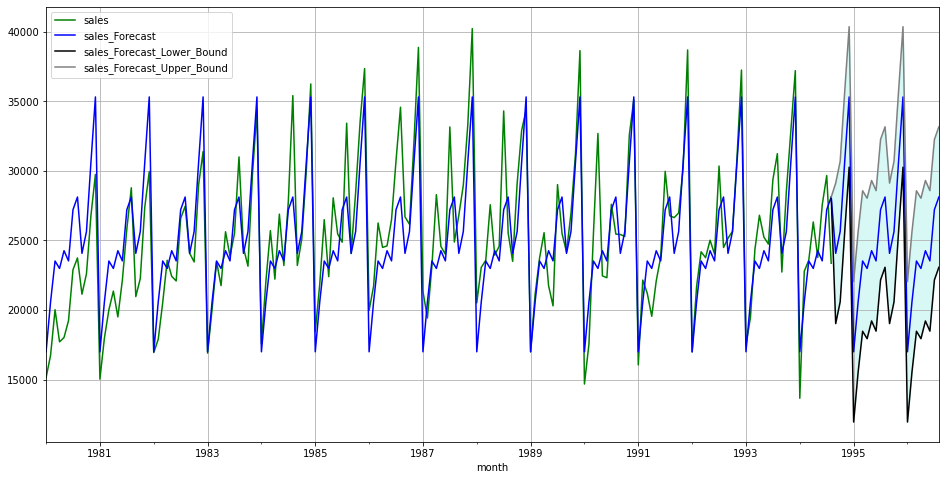

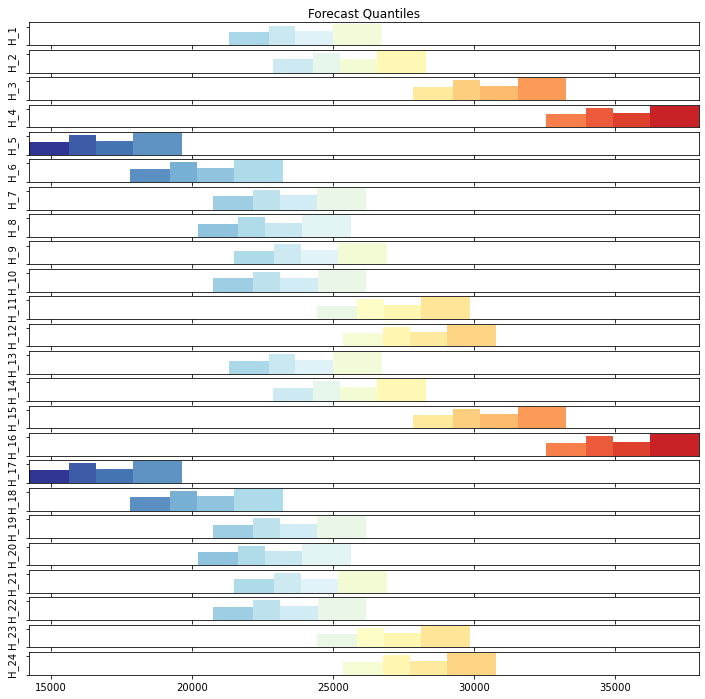

In [3]:


lEngine = autof.cForecastEngine()
lEngine.mOptions.set_active_decomposition_types([ 'T+S+R', 'TS+R', 'TSR' ]);

lEngine

H = 24
# lEngine.mOptions.enable_slow_mode();
# lEngine.mOptions.mDebugPerformance = True;
lEngine.train(df , "month" , "sales", H);
lEngine.getModelInfo();
print(lEngine.mSignalDecomposition.mTrPerfDetails.head());

lEngine.mSignalDecomposition.mBestModel.mTimeInfo.mResolution

lEngine.standardPlots();


In [4]:

dfapp_in = df.copy();
dfapp_in.tail()

#H = 12
dfapp_out = lEngine.forecast(dfapp_in, H);
#dfapp_out.to_csv("outputs/ozone_apply_out.csv")
dfapp_out.tail(2 * H)
print("Forecast Columns " , dfapp_out.columns);
Forecast_DF = dfapp_out[['month' , 'sales', 'sales' + '_Forecast']]
print(Forecast_DF.info())
print("Forecasts\n" , Forecast_DF.tail(H));

print("\n\n<ModelInfo>")
print(lEngine.to_json());
print("</ModelInfo>\n\n")
print("\n\n<Forecast>")
print(Forecast_DF.tail(2*H).to_json(date_format='iso'))
print("</Forecast>\n\n")


INFO:pyaf.std:START_FORECASTING '['sales']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['sales']' 0.364121675491333


Forecast Columns  Index(['month', 'sales', 'row_number', 'month_Normalized', '_sales',
       '_sales_ConstantTrend', '_sales_ConstantTrend_residue',
       '_sales_ConstantTrend_residue_Seasonal_MonthOfYear',
       '_sales_ConstantTrend_residue_Seasonal_MonthOfYear_residue',
       '_sales_ConstantTrend_residue_Seasonal_MonthOfYear_residue_NoAR',
       '_sales_ConstantTrend_residue_Seasonal_MonthOfYear_residue_NoAR_residue',
       '_sales_Trend', '_sales_Trend_residue', '_sales_Cycle',
       '_sales_Cycle_residue', '_sales_AR', '_sales_AR_residue',
       '_sales_TransformedForecast', 'sales_Forecast',
       '_sales_TransformedResidue', 'sales_Residue',
       'sales_Forecast_Lower_Bound', 'sales_Forecast_Upper_Bound',
       'sales_Forecast_Quantile_10', 'sales_Forecast_Quantile_30',
       'sales_Forecast_Quantile_50', 'sales_Forecast_Quantile_70',
       'sales_Forecast_Quantile_90'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199

In [5]:
lEngine.mSignalDecomposition.mModelShortList

,Transformation,DecompositionType,Model,ForecastMAPE,Complexity
0,_sales,T+S+R,_sales_ConstantTrend_residue_Seasonal_MonthOfY...,0.0729,12.0
